In [114]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
import nltk as nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, ReLU, Dropout, GlobalMaxPooling1D, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [115]:
data = pd.read_csv("/content/amazon.csv")
data.head()

Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

In [116]:
data.shape

(19996, 2)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [118]:
data.describe()

label
count  19996.000000
mean       0.761652
std        0.426083
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

In [119]:
data.label.value_counts()

label
1    15230
0     4766
Name: count, dtype: int64

In [120]:
data.label.value_counts(normalize= True)

label
1    0.761652
0    0.238348
Name: proportion, dtype: float64

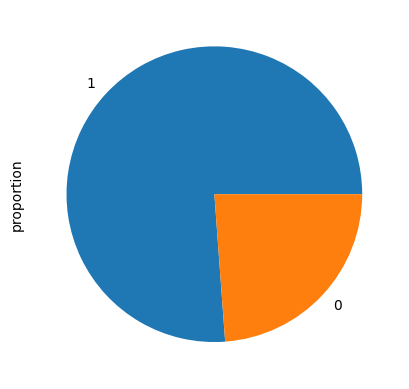

In [121]:
data.label.value_counts(normalize= True).plot.pie()
plt.show()


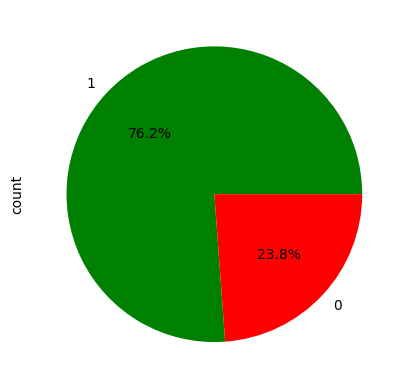

In [122]:
colors = ["green", "red", "magenta", "orange"]
data.label.value_counts().plot.pie(colors = colors, autopct = "%1.1f%%")
plt.show()

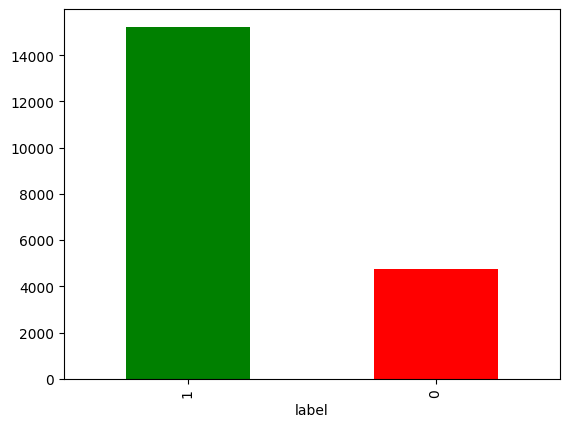

In [123]:
colors = ["green", "red", "magenta", "orange"]
data.label.value_counts().plot.bar(color = colors)
plt.show()

In [124]:
data.isnull().value_counts()

Text   label
False  False    19996
Name: count, dtype: int64

In [125]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [126]:
def remove_punct(text):

    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['Text_nopunc'] = data['Text'].apply(lambda x: remove_punct(x.lower()))

data.head()

Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

   label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                      Text_nopunc  
0       this is  the best apps acording to a bunch of people and i agree it has bombs eggs pigs tnt king pigs and realustic stuff  
1  this is a pretty good version of the game for being free there are lots of different levels to play my kids enjoy it a lot too  
2                                            this is a really  there are a bunch of levels and you can find golden eggs super fun  
3                         this is a silly game and can be frustrating but lots of fun and definitely recommend just as a fun time  
4              this is a terrific game on any pad hrs of fun  my grandkids love it great entertainment when waiting in long lines

In [127]:
pd.set_option('display.max_colwidth', 200)

In [128]:
from nltk.tokenize import word_tokenize

In [129]:
import re

In [130]:
!pip install nltk
import nltk

nltk.download('punkt')

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

data['Text_tokenized'] = data['Text_nopunc'].apply(lambda x: tokenize(x))

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

   label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                      Text_nopunc  \
0       this is  the best apps acording to a bunch of people and i agree it has bombs eggs pigs tnt king pigs and realustic stuff   
1  this is a pretty good version of the game for being free there are lots of different levels to play my kids enjoy it a lot too   
2                                            this is a really  there are a bunch of levels and you can find golden eggs super fun   
3                         this is a silly game and can be frustrating but lots of fun and definitely recommend just as a fun time   
4              this is a terrific game on any pad hrs of fun  my grandkids love it great entertainment when waiting in long lines   

                                                                                                                                               Text_tokenized  
0          [this, is, the, best, apps, acording, to, a, bunch, of, people, and, i, agree, it, has, bombs, eggs, pigs, tnt, king, pigs, and, realustic, stuff]  
1  [this, is, a, pretty, good, version, of, the, game, for, being, free, there, are, lots, of, different, levels, to, play, my, kids, enjoy, it, a, lot, too]  
2                                                      [this, is, a, really, there, are, a, bunch, of, levels, and, you, can, find, golden, eggs, super, fun]  
3                               [this, is, a, silly, game, and, can, be, frustrating, but, lots, of, fun, and, definitely, recommend, just, as, a, fun, time]  
4                    [this, is, a, terrific, game, on, any, pad, hrs, of, fun, my, grandkids, love, it, great, entertainment, when, waiting, in, long, lines]

In [131]:
data.sample(10)

Text  \
18883                                                                                      WORST APP EVER!! Don't get if you have a Kindle Fire, you have to have a microphone for it to work but its stupid!!   
2140   This app is a pretty good app, I have a great time when I play this.  Don't listen to the bad reviews because they are off of previous versions of the game.  I have a kindle fire, so this game is ...   
6110                                                                                       Hopefully this will get fixed. Force close on droid x gingerbread. I hope they send an update son to fix the issue.   
14526                                                      Great fun. This game is challenging and addictive. Quest was a little short though but taught you all of the modes of play. A buck is a great deal.   
10865                             It is really nice to see an app done right. This app covers the shopping function, order placement, fulfilment and order tracking.  all with an easay to use user interface.   
8814                                                                    This was the last piece of the puzzle needed to ditch my trusty Palm after 10 yrs. Everything transferred seamlessly.Loving it so far.   
3821                                                              All Amazon apps are spy ware. I'm getting rid of them all! Amazon has failed me. I bought the real up to date version of calengoo from play.   
7085                                                                                             Weird it seems to know what's happening. Coincide or not? Check it out and see. Or maybe I'm just nuts lol ;)   
8091                                                                I really Love the free You Tube downloader. I easily find older music that I liked when I was younger and can enjoy it again via You Tube.   
16289                                            This app sucked waste of space!!!!! Don't get it! I would have put zero stars but my kindle fire wouldn't let me!! Please if u r not a idiot don't get it! :(   

       label  \
18883      0   
2140       1   
6110       0   
14526      1   
10865      1   
8814       1   
3821       0   
7085       1   
8091       1   
16289      0   

                                                                                                                                                                                                   Text_nopunc  \
18883                                                                                            worst app ever dont get if you have a kindle fire you have to have a microphone for it to work but its stupid   
2140   this app is a pretty good app i have a great time when i play this  dont listen to the bad reviews because they are off of previous versions of the game  i have a kindle fire so this game is meant...   
6110                                                                                          hopefully this will get fixed force close on droid x gingerbread i hope they send an update son to fix the issue   
14526                                                          great fun this game is challenging and addictive quest was a little short though but taught you all of the modes of play a buck is a great deal   
10865                                  it is really nice to see an app done right this app covers the shopping function order placement fulfilment and order tracking  all with an easay to use user interface   
8814                                                                       this was the last piece of the puzzle needed to ditch my trusty palm after 10 yrs everything transferred seamlesslyloving it so far   
3821                                                                   all amazon apps are spy ware im getting rid of them all amazon has failed me i bought the real up to date version of calengoo from play   
7085                              

In [132]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
stopwords_En = nltk.corpus.stopwords.words('english')
stopwords_En.remove('no')
stopwords_En.remove('not')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

data['Text_nostop'] = data['Text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

   label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                      Text_nopunc  \
0       this is  the best apps acording to a bunch of people and i agree it has bombs eggs pigs tnt king pigs and realustic stuff   
1  this is a pretty good version of the game for being free there are lots of different levels to play my kids enjoy it a lot too   
2                                            this is a really  there are a bunch of levels and you can find golden eggs super fun   
3                         this is a silly game and can be frustrating but lots of fun and definitely recommend just as a fun time   
4              this is a terrific game on any pad hrs of fun  my grandkids love it great entertainment when waiting in long lines   

                                                                                                                                               Text_tokenized  \
0          [this, is, the, best, apps, acording, to, a, bunch, of, people, and, i, agree, it, has, bombs, eggs, pigs, tnt, king, pigs, and, realustic, stuff]   
1  [this, is, a, pretty, good, version, of, the, game, for, being, free, there, are, lots, of, different, levels, to, play, my, kids, enjoy, it, a, lot, too]   
2                                                      [this, is, a, really, there, are, a, bunch, of, levels, and, you, can, find, golden, eggs, super, fun]   
3                               [this, is, a, silly, game, and, can, be, frustrating, but, lots, of, fun, and, definitely, recommend, just, as, a, fun, time]   
4                    [this, is, a, terrific, game, on, any, pad, hrs, of, fun, my, grandkids, love, it, great, entertainment, when, waiting, in, long, lines]   

                                                                                          Text_nostop  
0  [best, apps, acording, bunch, people, agree, bombs, eggs, pigs, tnt, king, pigs, realustic, stuff]  
1                [pretty, good, version, game, free, lots, different, levels, play, kids, enjoy, lot]  
2                                             [really, bunch, levels, find, golden, eggs, super, fun]  
3                             [silly, game, frustrating, lots, fun, definitely, recommend, fun, time]  
4        [terrific, game, pad, hrs, fun, grandkids, love, great, entertainment, waiting, long, lines]

In [134]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [135]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [136]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['Text_lemmatized'] = data['Text_nostop'].apply(lambda x: lemmatizing(x))

data.head(5)

Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

   label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                      Text_nopunc  \
0       this is  the best apps acording to a bunch of people and i agree it has bombs eggs pigs tnt king pigs and realustic stuff   
1  this is a pretty good version of the game for being free there are lots of different levels to play my kids enjoy it a lot too   
2                                            this is a really  there are a bunch of levels and you can find golden eggs super fun   
3                         this is a silly game and can be frustrating but lots of fun and definitely recommend just as a fun time   
4              this is a terrific game on any pad hrs of fun  my grandkids love it great entertainment when waiting in long lines   

                                                                                                                                               Text_tokenized  \
0          [this, is, the, best, apps, acording, to, a, bunch, of, people, and, i, agree, it, has, bombs, eggs, pigs, tnt, king, pigs, and, realustic, stuff]   
1  [this, is, a, pretty, good, version, of, the, game, for, being, free, there, are, lots, of, different, levels, to, play, my, kids, enjoy, it, a, lot, too]   
2                                                      [this, is, a, really, there, are, a, bunch, of, levels, and, you, can, find, golden, eggs, super, fun]   
3                               [this, is, a, silly, game, and, can, be, frustrating, but, lots, of, fun, and, definitely, recommend, just, as, a, fun, time]   
4                    [this, is, a, terrific, game, on, any, pad, hrs, of, fun, my, grandkids, love, it, great, entertainment, when, waiting, in, long, lines]   

                                                                                          Text_nostop  \
0  [best, apps, acording, bunch, people, agree, bombs, eggs, pigs, tnt, king, pigs, realustic, stuff]   
1                [pretty, good, version, game, free, lots, different, levels, play, kids, enjoy, lot]   
2                                             [really, bunch, levels, find, golden, eggs, super, fun]   
3                             [silly, game, frustrating, lots, fun, definitely, recommend, fun, time]   
4        [terrific, game, pad, hrs, fun, grandkids, love, great, entertainment, waiting, long, lines]   

                                                                                  Text_lemmatized  
0  [best, apps, acording, bunch, people, agree, bomb, egg, pig, tnt, king, pig, realustic, stuff]  
1               [pretty, good, version, game, free, lot, different, level, play, kid, enjoy, lot]  
2                                           [really, bunch, level, find, golden, egg, super, fun]  
3                          [silly, game, frustrating, lot, fun, definitely, recommend, fun, time]  
4      [terrific, game, pad, hr, fun, grandkids, love, great, entertainment, waiting, long, line]

In [137]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords_En])
    return text

data=data[['label','Text']]
data['cleaned_Text'] = data['Text'].apply(lambda x: clean_text(x))

In [138]:
data.shape

(19996, 3)

In [139]:
data.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

                                                                      cleaned_Text  
0  best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff  
1             pretty good version game free lot different level play kid enjoy lot  
2                                     really bunch level find golden egg super fun  
3                     silly game frustrating lot fun definitely recommend fun time  
4    terrific game pad hr fun grandkids love great entertainment waiting long line

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create TF-IDF features
tfidf = TfidfVectorizer(ngram_range=(1, 3))
features_tfidf = tfidf.fit_transform(data['cleaned_Text'])


In [141]:
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)

(19996, 486967)
Sparse Matrix :
   (0, 51854)	0.06812679672693296
  (0, 38295)	0.06657229156212867
  (0, 7883)	0.17504251032367202
  (0, 63529)	0.11509872482099595
  (0, 317578)	0.07327259942982468
  (0, 13423)	0.12055826460894654
  (0, 58209)	0.1404992089439883
  (0, 123609)	0.1304222515392549
  (0, 324201)	0.2346278363522202
  (0, 429198)	0.17504251032367202
  (0, 232866)	0.1269819726569719
  (0, 353361)	0.17504251032367202
  (0, 405707)	0.09399663342758315
  (0, 51976)	0.1269819726569719
  (0, 38314)	0.17504251032367202
  (0, 7884)	0.17504251032367202
  (0, 63610)	0.1680912559528503
  (0, 317608)	0.17504251032367202
  (0, 13434)	0.17504251032367202
  (0, 58221)	0.17504251032367202
  (0, 123640)	0.17504251032367202
  (0, 324307)	0.17504251032367202
  (0, 429199)	0.17504251032367202
  (0, 232883)	0.17504251032367202
  (0, 324285)	0.17504251032367202
  :	:
  (19995, 142802)	0.13011740471426889
  (19995, 451352)	0.13011740471426889
  (19995, 172930)	0.13011740471426889
  (19995, 364885)

In [142]:
from textblob import TextBlob

data['sentiment_polarity'] = data['cleaned_Text'].apply(lambda x:
                                                       TextBlob(x).sentiment.polarity)
data['sentiment_subjectivity'] = data['cleaned_Text'].apply(lambda x:
                                                         TextBlob(x).sentiment.subjectivity)

In [143]:
data.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

                                                                      cleaned_Text  \
0  best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff   
1             pretty good version game free lot different level play kid enjoy lot   
2                                     really bunch level find golden egg super fun   
3                     silly game frustrating lot fun definitely recommend fun time   
4    terrific game pad hr fun grandkids love great entertainment waiting long line   

   sentiment_polarity  sentiment_subjectivity  
0            1.000000                0.300000  
1            0.225000                0.650000  
2            0.283333                0.391667  
3           -0.116667                0.512500  
4            0.191667                0.558333

In [144]:
data['sentiment_polarity']

0        1.000000
1        0.225000
2        0.283333
3       -0.116667
4        0.191667
           ...   
19991   -0.225000
19992    0.275000
19993    0.350000
19994    0.575000
19995    0.091667
Name: sentiment_polarity, Length: 19996, dtype: float64

In [145]:
!pip install nrclex
from nrclex import NRCLex

text_object = NRCLex(data['cleaned_Text'][0])
data['emotions'] = data['cleaned_Text'].apply(lambda x: NRCLex(x).top_emotions)

In [146]:
data['text_length'] = data['cleaned_Text'].apply(lambda x: len(x.split()))

In [147]:
import nltk
nltk.download('averaged_perceptron_tagger')

data['pos_tags'] = data['cleaned_Text'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [148]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['cleaned_Text'])

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Get topics for each document
topic_results = LDA.transform(dtm)
data['topic'] = topic_results.argmax(axis=1)

In [149]:
data.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                Text  \
0          This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff   
1  This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.   
2                                            this is a really . there are a bunch of levels and you can find golden eggs. super fun.   
3                          This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.   
4              This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines   

                                                                      cleaned_Text  \
0  best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff   
1             pretty good version game free lot different level play kid enjoy lot   
2                                     really bunch level find golden egg super fun   
3                     silly game frustrating lot fun definitely recommend fun time   
4    terrific game pad hr fun grandkids love great entertainment waiting long line   

   sentiment_polarity  sentiment_subjectivity  \
0            1.000000                0.300000   
1            0.225000                0.650000   
2            0.283333                0.391667   
3           -0.116667                0.512500   
4            0.191667                0.558333   

                                                                                          emotions  \
0                                                                 [(negative, 0.2727272727272727)]   
1                                  [(trust, 0.26666666666666666), (positive, 0.26666666666666666)]   
2                                                                                [(positive, 0.4)]   
3  [(positive, 0.2727272727272727), (joy, 0.2727272727272727), (anticipation, 0.2727272727272727)]   
4                                                                 [(positive, 0.3076923076923077)]   

   text_length  \
0           14   
1           12   
2            8   
3            9   
4           12   

                                                                                                                                                                                  pos_tags  \
0  [(best, JJS), (apps, NN), (acording, VBG), (bunch, JJ), (people, NNS), (agree, VBP), (bomb, NN), (egg, NN), (pig, NN), (tnt, NN), (king, VBG), (pig, JJ), (realustic, JJ), (stuff, NN)]   
1                               [(pretty, RB), (good, JJ), (version, NN), (game, NN), (free, JJ), (lot, NN), (different, JJ), (level, NN), (play, NN), (kid, VBZ), (enjoy, NN), (lot, NN)]   
2                                                                                   [(really, RB), (bunch, JJ), (level, NN), (find, VBP), (golden, JJ), (egg, NN), (super, NN), (fun, NN)]   
3                                                            [(silly, RB), (game, NN), (frustrating, NN), (lot, NN), (fun, RBR), (definitely, RB), (recommend, VB), (fun, NN), (time, NN)]   
4                    [(terrific, JJ), (game, NN), (pad, NN), (hr, NN), (fun, NN), (grandkids, NNS), (love, VBP), (great, JJ), (entertainment, NN), (waiting, VBG), (long, JJ), (line, NN)]   

   topic  
0      4  
1      2  
2      2  
3      2  
4      2

In [150]:
data['topic'].value_counts()

topic
2    5757
0    5700
1    4505
3    2936
4    1098
Name: count, dtype: int64

## EDA 📊

In [151]:
import seaborn as sns

### Q1: How does sentiment polarity vary across the dataset  (distribution) ?


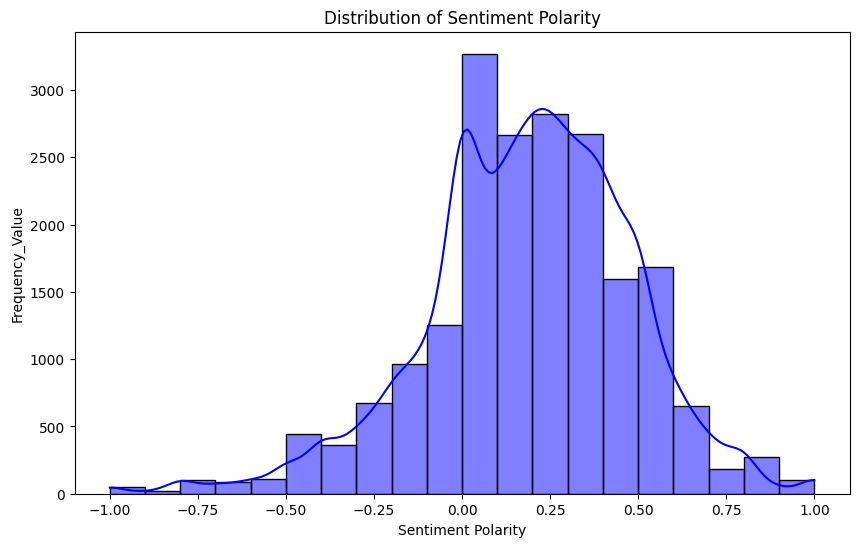

In [152]:
# Sentiment Polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_polarity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency_Value')
plt.show()

### **Insights:**
*   The majority of reviews are either neutral or slightly positive based on this plot, which represents that most sentiment polarity values ​​are centered around neutrality.
* the negative reviews is the least.




### Q2: How does Sentiment Subjectivity vary across the dataset  (distribution)?

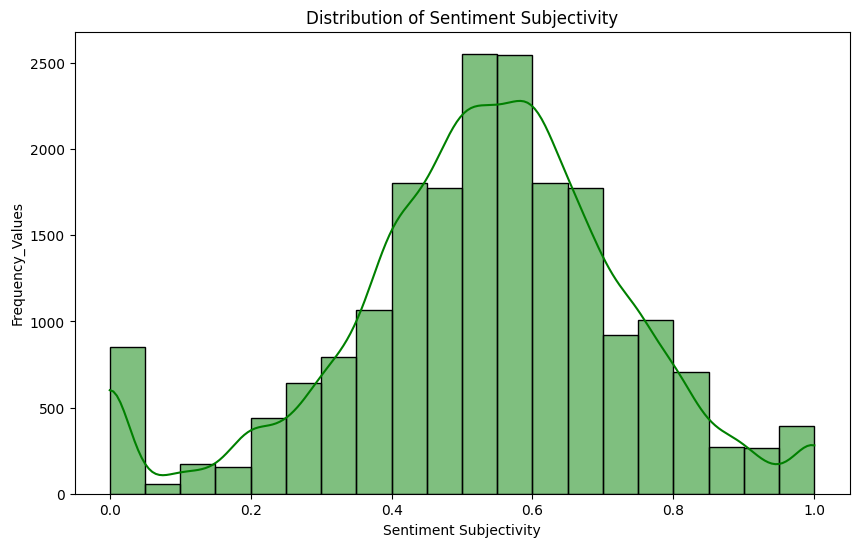

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_subjectivity'], bins=20, kde=True, color='green',)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency_Values')
plt.show()

### **Insights:**
*   The distribution of reviews is neutral  based on this plot, which represents that most sentiment Subjectivity values ​​are centered around neutrality.


In [154]:
data['emotions']

0                                                                       [(negative, 0.2727272727272727)]
1                                        [(trust, 0.26666666666666666), (positive, 0.26666666666666666)]
2                                                                                      [(positive, 0.4)]
3        [(positive, 0.2727272727272727), (joy, 0.2727272727272727), (anticipation, 0.2727272727272727)]
4                                                                       [(positive, 0.3076923076923077)]
                                                      ...                                               
19991                                                                                 [(negative, 0.25)]
19992                               [(positive, 0.3333333333333333), (anticipation, 0.3333333333333333)]
19993                                                                  [(positive, 0.375), (joy, 0.375)]
19994                                                                [(positive, 0.3125), (joy, 0.3125)]
19995                                                                                  [(positive, 0.5)]
Name: emotions, Length: 19996, dtype: object

### Extract the actual emotion from emotions tuple

In [155]:
emotion_list = [emotion for sublist in data['emotions'] for emotion in sublist]
emotion_list

[('negative', 0.2727272727272727),
 ('trust', 0.26666666666666666),
 ('positive', 0.26666666666666666),
 ('positive', 0.4),
 ('positive', 0.2727272727272727),
 ('joy', 0.2727272727272727),
 ('anticipation', 0.2727272727272727),
 ('positive', 0.3076923076923077),
 ('anticipation', 0.3),
 ('trust', 0.21428571428571427),
 ('positive', 0.21428571428571427),
 ('trust', 0.2),
 ('surprise', 0.2),
 ('positive', 0.2),
 ('joy', 0.2),
 ('anticipation', 0.2),
 ('anticipation', 1.0),
 ('negative', 0.2222222222222222),
 ('positive', 0.23076923076923078),
 ('anticipation', 0.4),
 ('trust', 0.2222222222222222),
 ('surprise', 0.2222222222222222),
 ('positive', 0.2222222222222222),
 ('trust', 0.2727272727272727),
 ('positive', 0.2727272727272727),
 ('anger', 0.25),
 ('negative', 0.25),
 ('disgust', 0.25),
 ('anticipation', 0.25),
 ('anticipation', 0.3333333333333333),
 ('anger', 0.21428571428571427),
 ('negative', 0.21428571428571427),
 ('disgust', 0.21428571428571427),
 ('positive', 0.3333333333333333)

In [156]:
actual_emotion=[emotion[0] for emotion in emotion_list]
actual_emotion

['negative',
 'trust',
 'positive',
 'positive',
 'positive',
 'joy',
 'anticipation',
 'positive',
 'anticipation',
 'trust',
 'positive',
 'trust',
 'surprise',
 'positive',
 'joy',
 'anticipation',
 'anticipation',
 'negative',
 'positive',
 'anticipation',
 'trust',
 'surprise',
 'positive',
 'trust',
 'positive',
 'anger',
 'negative',
 'disgust',
 'anticipation',
 'anticipation',
 'anger',
 'negative',
 'disgust',
 'positive',
 'joy',
 'anticipation',
 'trust',
 'positive',
 'joy',
 'anticipation',
 'positive',
 'positive',
 'joy',
 'fear',
 'anger',
 'anticip',
 'trust',
 'surprise',
 'positive',
 'negative',
 'sadness',
 'disgust',
 'joy',
 'positive',
 'joy',
 'negative',
 'fear',
 'anger',
 'positive',
 'negative',
 'disgust',
 'positive',
 'negative',
 'positive',
 'joy',
 'anticipation',
 'fear',
 'negative',
 'positive',
 'joy',
 'anticipation',
 'positive',
 'anticipation',
 'anticipation',
 'positive',
 'positive',
 'anger',
 'negative',
 'positive',
 'fear',
 'positive'

### what counts for each emotion ?

In [157]:
df_emotion=pd.DataFrame(actual_emotion)
df_emotion.columns=['emotion']
df_emotion

emotion
0      negative
1         trust
2      positive
3      positive
4      positive
...         ...
46347  positive
46348       joy
46349  positive
46350       joy
46351  positive

[46352 rows x 1 columns]

In [158]:
counts=df_emotion.value_counts()
df_emotion_counts=pd.DataFrame(counts)
df_emotion_counts

count
emotion            
positive      14156
negative       5665
anticipation   4948
joy            4828
trust          4553
fear           3393
sadness        2206
surprise       1987
anger          1970
disgust        1723
anticip         923

#### count each emotion

In [159]:
df_emotion_counts.columns = ['count']
df_emotion_counts = df_emotion_counts.reset_index()
df_emotion_counts.columns = ['emotion', 'count']
df_emotion_counts

emotion  count
0       positive  14156
1       negative   5665
2   anticipation   4948
3            joy   4828
4          trust   4553
5           fear   3393
6        sadness   2206
7       surprise   1987
8          anger   1970
9        disgust   1723
10       anticip    923

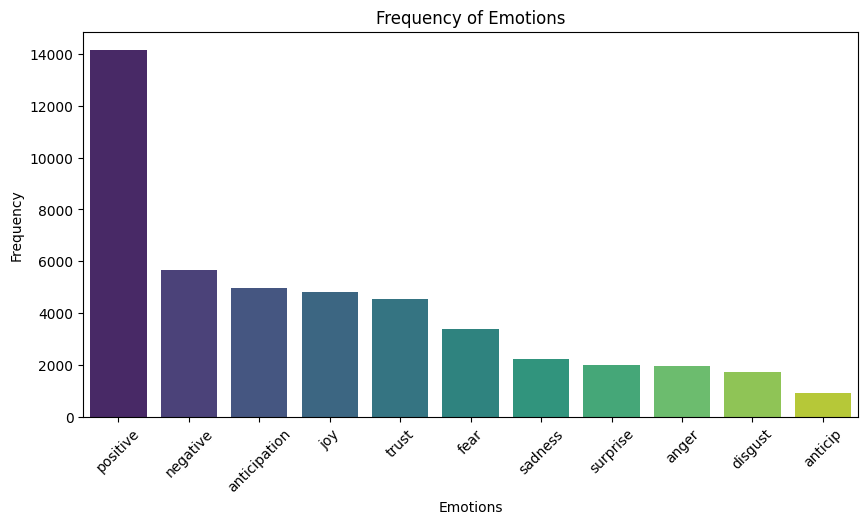

In [160]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_emotion_counts['emotion'], y=df_emotion_counts['count'], data=df_emotion_counts, palette='viridis')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Frequency of Emotions')
plt.xticks(rotation=45)
plt.show()

### **Insights:**
* The most frequency of emotions is 'positive'
* The least frequency of emotions is 'anticip'

### Q : What is the length of the most frequent text ?

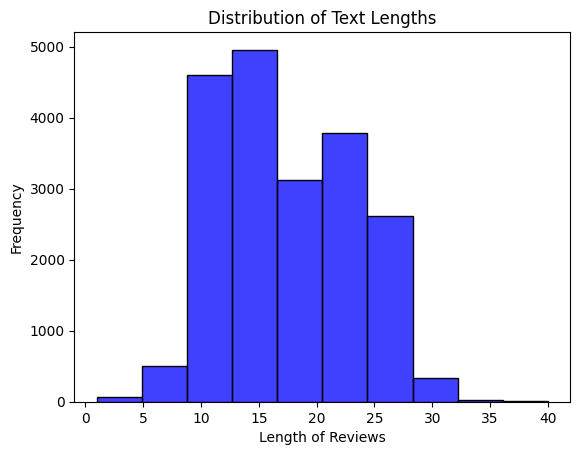

In [161]:
sns.histplot(data['text_length'], bins=10, color='blue')
plt.xlabel('Length of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

**Insight:**

 - number 15 is  the length of the most frequent text (most texts have length 15)



### Q : what is the frequency of each word in text?
### Q : what is the most word repeated in text ?
### Q : what is the least word repeated in text ?


In [162]:
all_words = ' '.join(data['cleaned_Text'])
all_words

'best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff pretty good version game free lot different level play kid enjoy lot really bunch level find golden egg super fun silly game frustrating lot fun definitely recommend fun time terrific game pad hr fun grandkids love great entertainment waiting long line entertaining game dont smart play guess thats like itits easy fun thats game suppose warned game highly addictive awesome dont need wi ti play trust really fun addicting like 100 level even free dont waste money expensive one mean seriously get app awesome bet no one even read review know game good dont need basicly free version ad thats actually awesome addicting free time really id reccomend far best free app available anywhere helped pas time nothing else would dont pas one p hate 20 word minimum definitely great get 6yearold grandnephew teach trick figured configuration tough beat dont particularly care spending 45 minute completing level fun time consum

In [163]:
word_list = all_words.split()
word_list

['best',
 'apps',
 'acording',
 'bunch',
 'people',
 'agree',
 'bomb',
 'egg',
 'pig',
 'tnt',
 'king',
 'pig',
 'realustic',
 'stuff',
 'pretty',
 'good',
 'version',
 'game',
 'free',
 'lot',
 'different',
 'level',
 'play',
 'kid',
 'enjoy',
 'lot',
 'really',
 'bunch',
 'level',
 'find',
 'golden',
 'egg',
 'super',
 'fun',
 'silly',
 'game',
 'frustrating',
 'lot',
 'fun',
 'definitely',
 'recommend',
 'fun',
 'time',
 'terrific',
 'game',
 'pad',
 'hr',
 'fun',
 'grandkids',
 'love',
 'great',
 'entertainment',
 'waiting',
 'long',
 'line',
 'entertaining',
 'game',
 'dont',
 'smart',
 'play',
 'guess',
 'thats',
 'like',
 'itits',
 'easy',
 'fun',
 'thats',
 'game',
 'suppose',
 'warned',
 'game',
 'highly',
 'addictive',
 'awesome',
 'dont',
 'need',
 'wi',
 'ti',
 'play',
 'trust',
 'really',
 'fun',
 'addicting',
 'like',
 '100',
 'level',
 'even',
 'free',
 'dont',
 'waste',
 'money',
 'expensive',
 'one',
 'mean',
 'seriously',
 'get',
 'app',
 'awesome',
 'bet',
 'no',
 'o

In [164]:
word_df=pd.DataFrame(word_list)
word_df.columns=['word']
word_df

word
0           best
1           apps
2       acording
3          bunch
4         people
...          ...
346780      pick
346781    farmer
346782      user
346783  stormids
346784         l

[346785 rows x 1 columns]

#### count each word in text

In [165]:
counts=word_df.value_counts()
word_df_counts=pd.DataFrame(counts)
word_df_counts

count
word           
app       10652
game       6718
not        4716
love       4262
great      4015
...         ...
muchthey      1
muchwant      1
mucking       1
muddled       1
eff           1

[22117 rows x 1 columns]

In [166]:
word_df_counts.columns = ['count']
word_df_counts = word_df_counts.reset_index()
word_df_counts.columns = ['word', 'count']
word_df_counts

word  count
0           app  10652
1          game   6718
2           not   4716
3          love   4262
4         great   4015
...         ...    ...
22112  muchthey      1
22113  muchwant      1
22114   mucking      1
22115   muddled      1
22116       eff      1

[22117 rows x 2 columns]

In [167]:
word_df_counts.head(10)

word  count
0     app  10652
1    game   6718
2     not   4716
3    love   4262
4   great   4015
5    like   4012
6     get   3464
7     use   3251
8  kindle   2888
9    time   2871

**Insights :**

*   the most word repeated in text 'app'
*   there are some words that has the least word repeated in text like 'eff'	'muddled'



In [168]:
from wordcloud import WordCloud, STOPWORDS

### Some visaulization for positive and negaative reviews

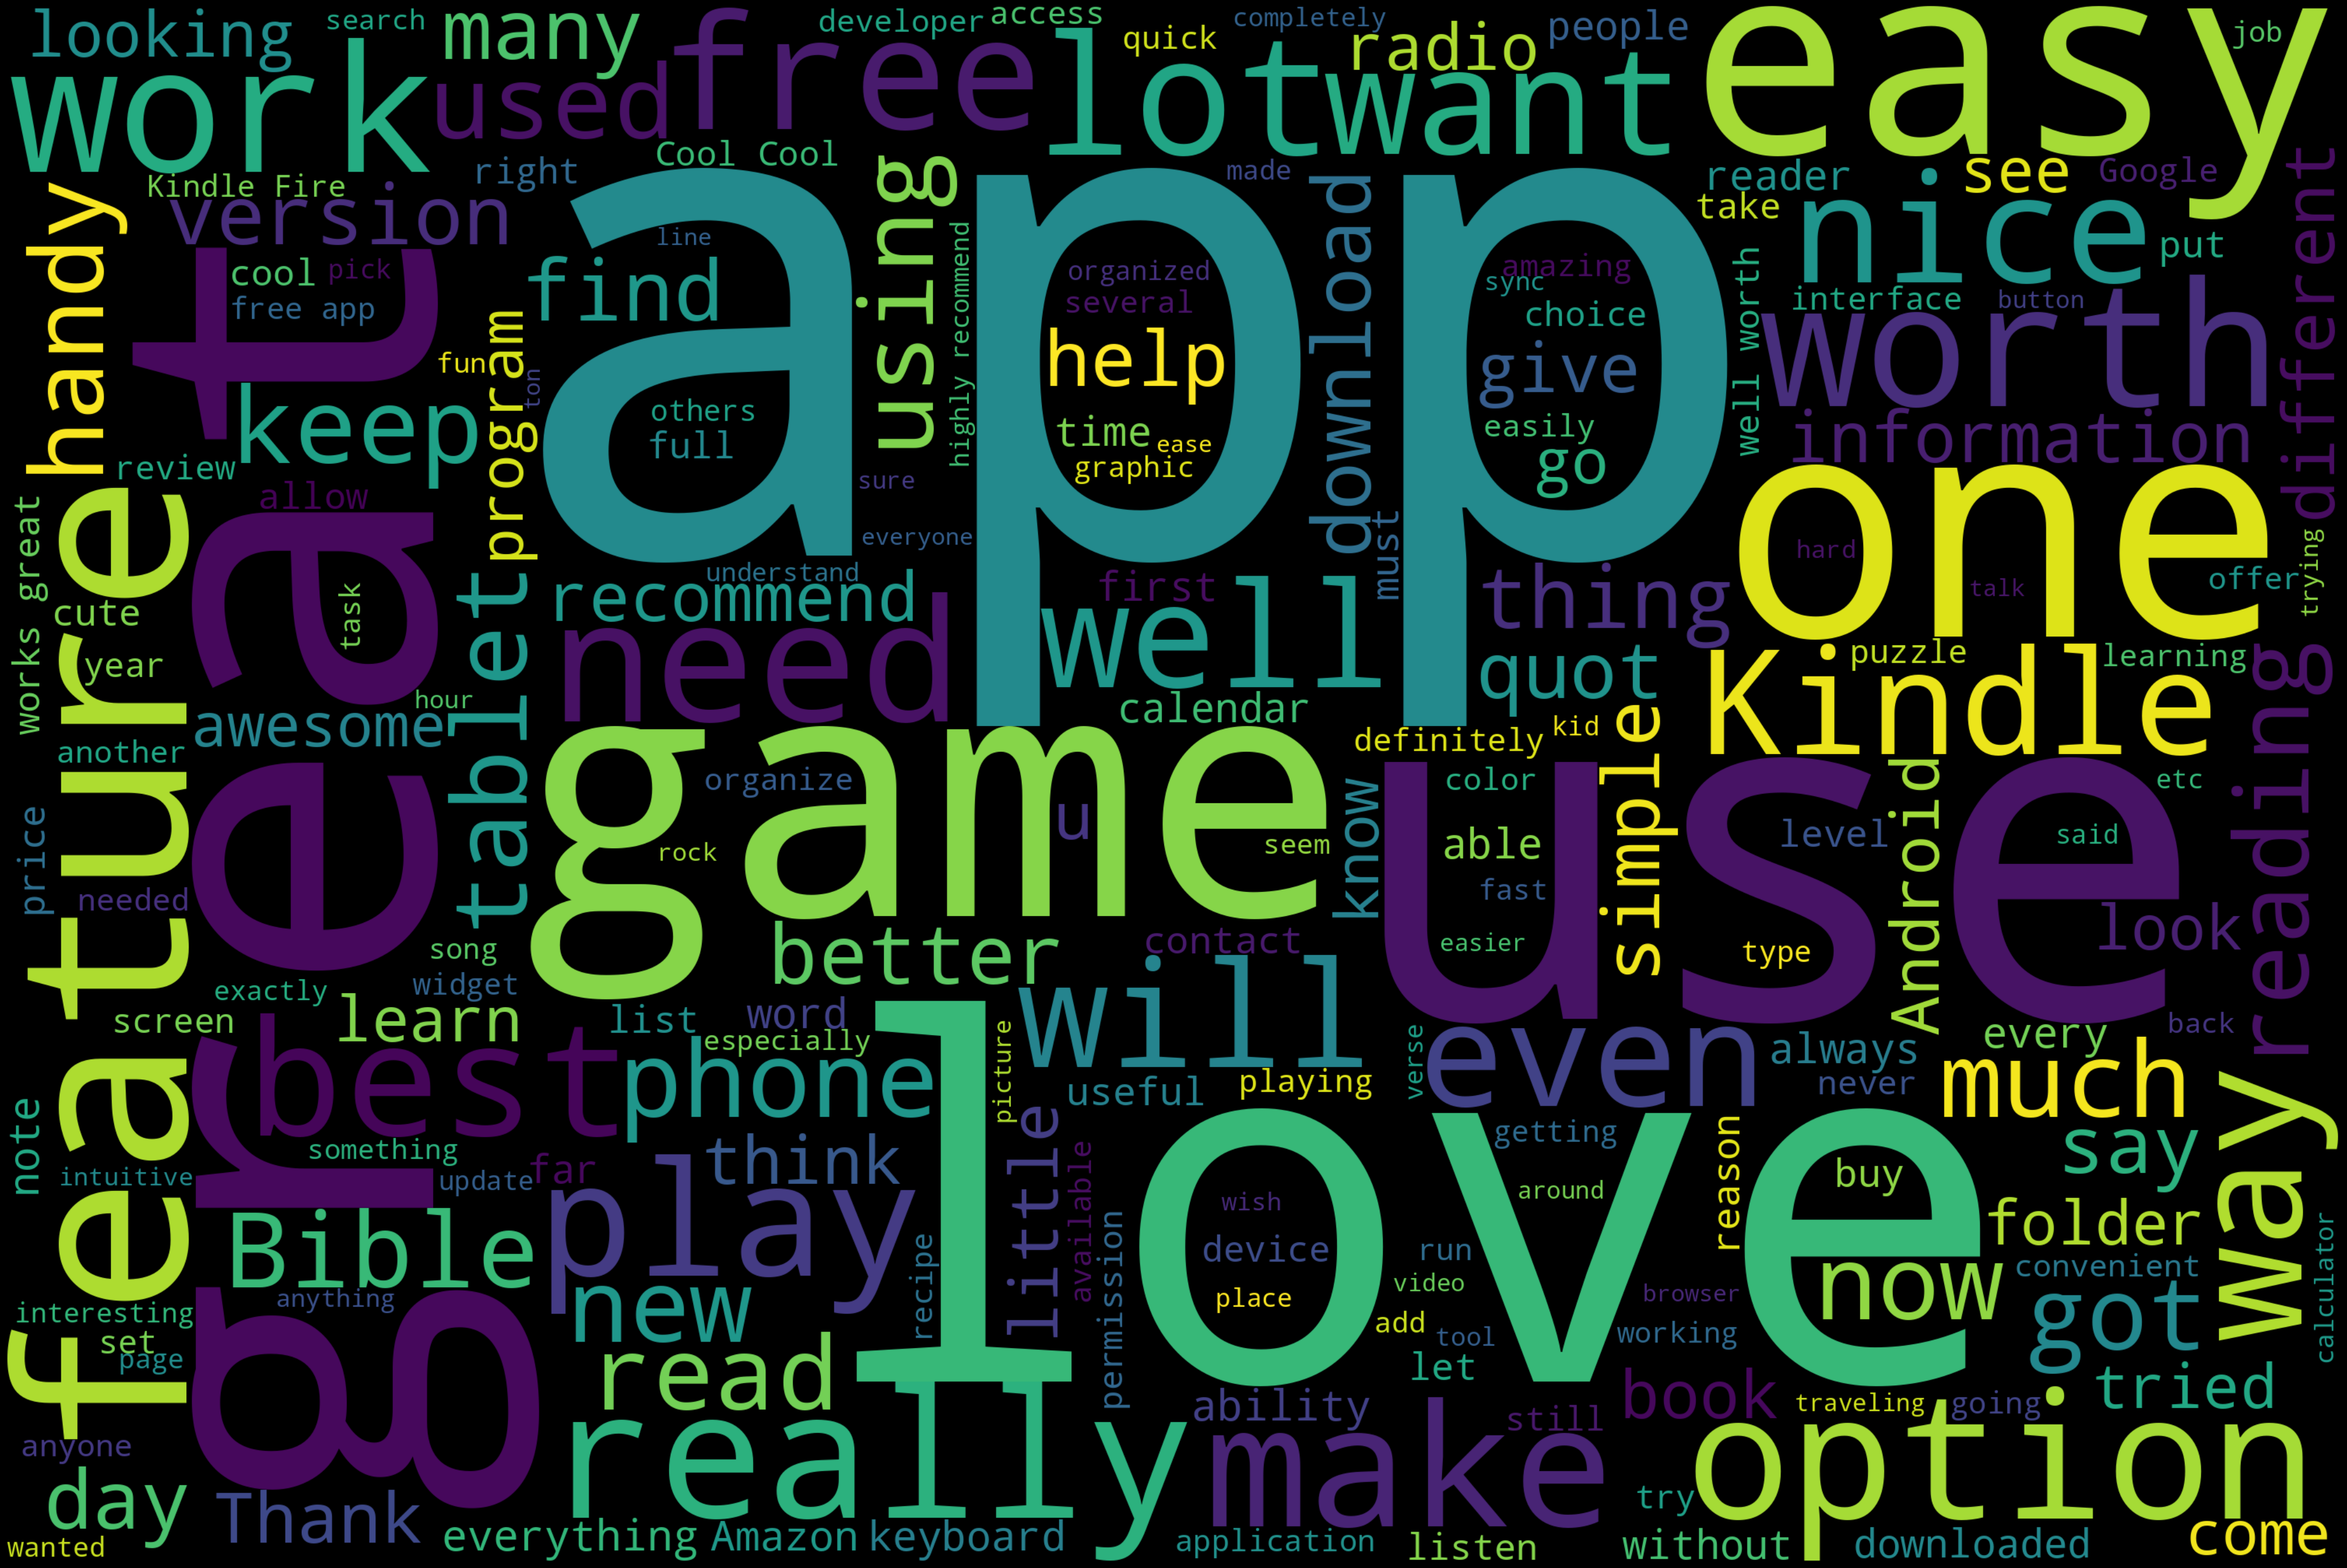

In [169]:
def is_positive_emotion(emotions):
    for emotion in emotions:
        if emotion[0] == 'positive' and emotion[1] > 0.5:
            return True
    return False


positive_reviews = data[data['emotions'].apply(is_positive_emotion)]

# Join all positive reviews together
text = ' '.join(positive_reviews['Text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud( width=3000,height=2000,background_color='black',stopwords=STOPWORDS, colormap='viridis').generate(text)

#  displaying the word cloud
fig = plt.figure(
    figsize=(40, 30),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Insight:
*   see positive words in text




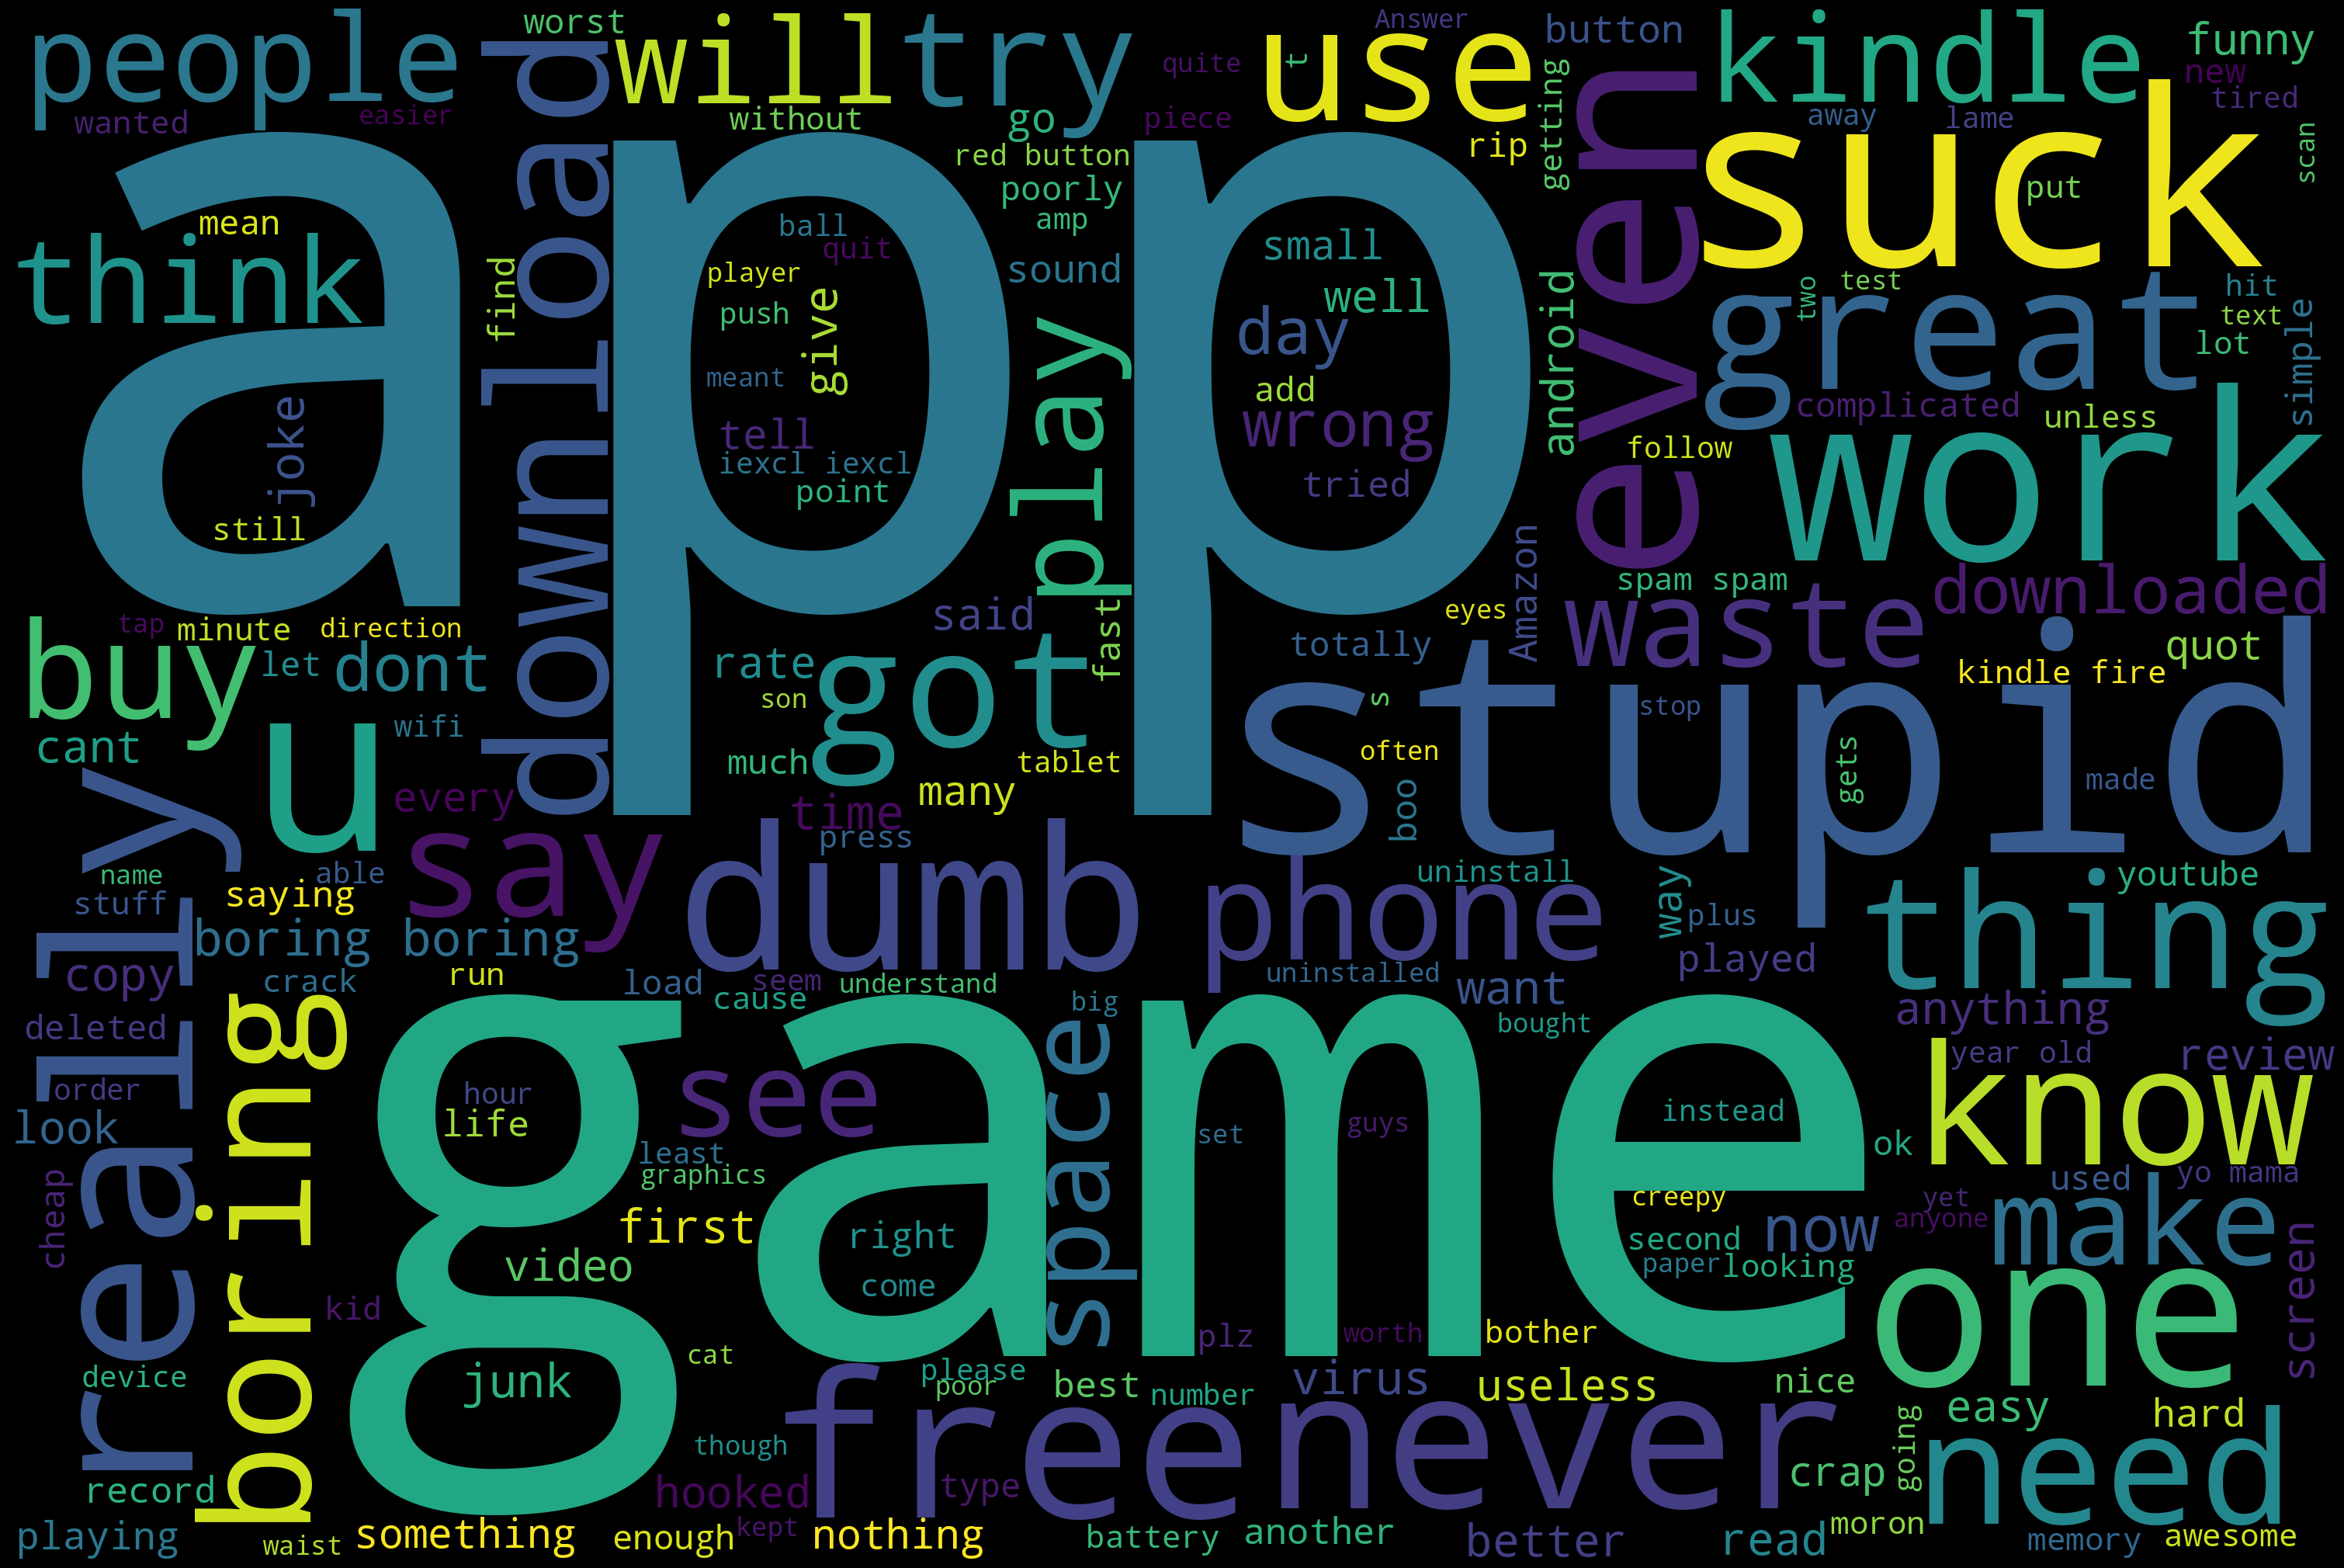

In [170]:
def is_negative_emotion(emotions):
    for emotion in emotions:
        if emotion[0] == 'negative' and emotion[1] > 0.5:
            return True
    return False


negative_reviews = data[data['emotions'].apply(is_negative_emotion)]

# Join all positive reviews together
text = ' '.join(negative_reviews['Text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud( width=3000,height=2000,background_color='black',stopwords=STOPWORDS, colormap='viridis').generate(text)

#  displaying the word cloud
fig = plt.figure(
    figsize=(30, 20),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Insight:
*   see negative words in text

Model

In [171]:
# Prepare your data
X = data['cleaned_Text']
y = data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [179]:
# Define constants
max_words = 10000
max_len = 50
embedding_dim = 100
num_classes = 2



In [180]:
# Define input layer
input_layer = Input(shape=(max_len,))

# Branch 1
branch1 = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(input_layer)
branch1 = Conv1D(128, 3, padding='same', activation='relu')(branch1)
branch1 = BatchNormalization()(branch1)
branch1 = ReLU()(branch1)
branch1 = Dropout(0.3)(branch1)
branch1 = Conv1D(128, 3, padding='same', activation='relu')(branch1)
branch1 = BatchNormalization()(branch1)
branch1 = GlobalMaxPooling1D()(branch1)

# Branch 2
branch2 = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(input_layer)
branch2 = Conv1D(128, 3, padding='same', activation='relu')(branch2)
branch2 = BatchNormalization()(branch2)
branch2 = ReLU()(branch2)
branch2 = Dropout(0.3)(branch2)
branch2 = Conv1D(128, 3, padding='same', activation='relu')(branch2)
branch2 = BatchNormalization()(branch2)
branch2 = GlobalMaxPooling1D()(branch2)



In [181]:
# Concatenating branches
concatenated = Concatenate()([branch1, branch2])

# Dense layers
hid_layer = Dense(256, activation='relu')(concatenated)
dropout = Dropout(0.3)(hid_layer)
output_layer = Dense(num_classes, activation='softmax')(dropout)




In [182]:
# Model compilation
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [183]:
# Fit the model
batch_size = 256
epochs = 50
history = model.fit(tr_x, tr_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_x, val_y),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 487ms/step - accuracy: 0.6988 - loss: 1.2527 - val_accuracy: 0.4150 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - accuracy: 0.8887 - loss: 0.2644 - val_accuracy: 0.2420 - val_loss: 0.7254 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 632ms/step - accuracy: 0.9412 - loss: 0.1577 - val_accuracy: 0.2395 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 480ms/step - accuracy: 0.9659 - loss: 0.0985 - val_accuracy: 0.2450 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 484ms/step - accuracy: 0.9818 - loss: 0.0551 - val_accuracy: 0.4505 - val_loss: 0.6916 - learning_rate: 5.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 492ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.7220 - val_loss: 0.5935 - learning_rate: 5.0000e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 482ms/step - accuracy: 0.9929 - 

In [184]:
# Calculate training accuracy
train_loss, train_accuracy = model.evaluate(tr_x, tr_y, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(ts_x, ts_y, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')


Training Accuracy: 1.0000
Test Accuracy: 0.9175


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


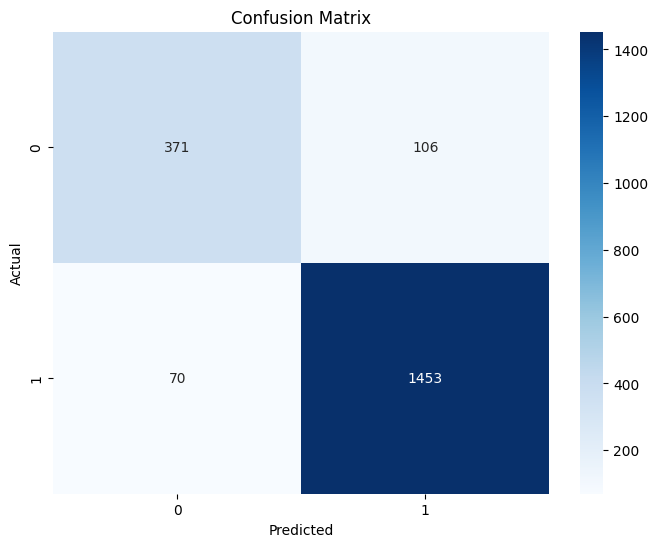

In [198]:
# Get predictions on the test set
y_test_pred = model.predict(ts_x)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Assuming ts_y is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(ts_y, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_test_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [201]:
# Save the model to a file
model.save('Amzon model.h5')


In [202]:
from tensorflow.keras.models import load_model

# Load the model from the file
loaded_model = load_model('Amzon model.h5')


In [204]:
import os

# Define the model filename
model_filename = 'Amzon model.h5'

# Get the path where the model will be saved
model_path = os.path.join('/content/', model_filename)

print(f'Model will be saved at: {model_path}')




Model will be saved at: /content/Amzon model.h5


In [206]:
from google.colab import files

files.download('Amzon model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>